# Linear Regression from Scratch

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use("fivethirtyeight")

In [2]:
# Hard coded points
# xs = np.array([1, 2, 3, 4, 5, 6], dtype=np.float64)
# ys = np.array([5, 4, 6, 5, 6, 7], dtype=np.float64)
# plt.figure(dpi=80)
# plt.scatter(xs, ys)
# plt.show()

## Testing Assumption

In [3]:
def create_dataset(data_points, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(data_points):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == "pos":
            val += step
        elif correlation and correlation == "neg":
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

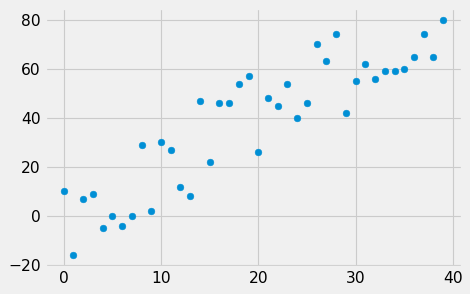

In [4]:
xs, ys = create_dataset(40, 20, 2, correlation="pos")
plt.figure(dpi=80)
plt.scatter(xs, ys)
plt.show()

In [5]:
def best_fit_slope_and_intercept(xs, ys):
    m = ((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs))**2 - mean(xs**2))
    b = mean(ys) - m * mean(xs)
    return m, b

def squared_error(ys_original, ys_line):
    return sum((ys_line - ys_original)**2)

def coefficient_of_determination(ys_original, ys_line):
    y_mean_line = [mean(ys_original) for y in ys_original]
    squared_error_of_regression_line = squared_error(ys_original, ys_line)
    squared_error_y_mean = squared_error(ys_original, y_mean_line)
    return 1 - (squared_error_of_regression_line / squared_error_y_mean)

In [6]:
m, b = best_fit_slope_and_intercept(xs, ys)
print("Best fit slope:", m)
print("Best fit y intercept:", b)

Best fit slope: 2.00469043152
Best fit y intercept: -0.991463414634


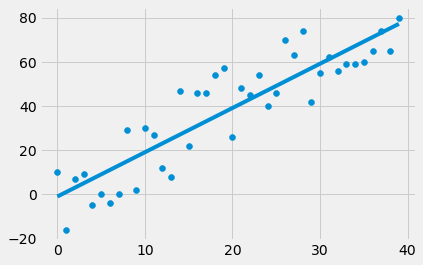

In [7]:
regression_line = [(m * x) + b for x in xs]
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

In [8]:
r_squared = coefficient_of_determination(ys, regression_line)
print("Coefficient of determination:", r_squared)

Coefficient of determination: 0.797069140747


## Prediction

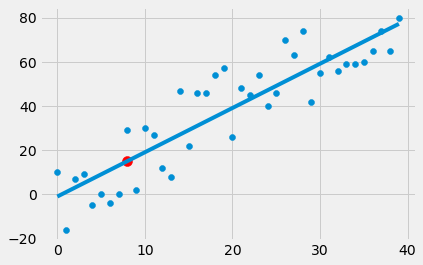

In [9]:
predict_x = 8
predict_y = (m * predict_x) + b
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, s=100, color="r")
plt.plot(xs, regression_line)
plt.show()